<a href="https://colab.research.google.com/github/srinikha193/Data-Analysis-Course-Work/blob/main/Clustering_Exercise_srinikha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the following dataset: <br>
df=pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv') <br><br>

In this dataset, some attributes are given for a mall’s customers. The goal is to understand the customers behaviors using clustering so that marketing can be done strategically. <br>


1. Convert categorical data to boolean values.
2. Drop the unnecessary column(s).
2. Normalize the dataset. (Hint: use the normalize method)
3. Apply K-means clustering setting the number of clusters to 3.
4. Display the labels and cluster centers.
5. Draw a scatter plot showing each cluster with a different color. Set x axis to gender and y to spending score.
6. Apply hierarchical clustering to the dataset you obtained in question 2 and plot the dendrogram. Use the average method.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Gender1'] = (df['Gender'] == 'Female').astype(int)
df.drop('Gender', axis=1, inplace=True)
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender1
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
columns_to_normalize = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.drop('CustomerID', axis=1, inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender1
0,0.019231,0.000000,0.387755,0
1,0.057692,0.000000,0.816327,0
2,0.038462,0.008197,0.051020,1
3,0.096154,0.008197,0.775510,1
4,0.250000,0.016393,0.397959,1
...,...,...,...,...
195,0.326923,0.860656,0.795918,1
196,0.519231,0.909836,0.275510,1
197,0.269231,0.909836,0.744898,0
198,0.269231,1.000000,0.173469,0


In [ ]:
'''data_scaled = normalize(df, axis=0)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()'''

'data_scaled = normalize(df, axis=0)\ndata_scaled = pd.DataFrame(data_scaled, columns=df.columns)\ndata_scaled.head()'

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender1
count,200.000000,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041,0.560000
std,0.268635,0.215285,0.263505,0.497633
min,0.000000,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388,0.000000
50%,0.346154,0.381148,0.500000,1.000000
75%,0.596154,0.516393,0.734694,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
km1 = KMeans(n_clusters=3, n_init=20)
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia.
km1.fit(df)

KMeans(n_clusters=3, n_init=20)

In [ ]:
km1.inertia_

29.552857611943857

In [ ]:
km1.cluster_centers_

array([[6.04567308e-01, 3.88661202e-01, 2.87840136e-01, 4.44089210e-16],
       [3.86504121e-01, 3.62704918e-01, 5.15579446e-01, 1.00000000e+00],
       [1.97115385e-01, 3.85245902e-01, 7.21173469e-01, 1.11022302e-16]])

In [ ]:
km1.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       0, 2], dtype=int32)

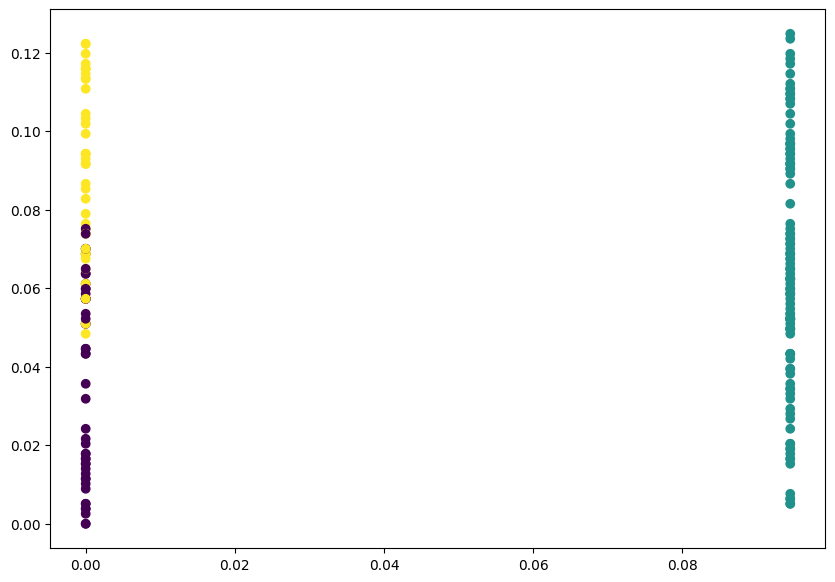

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Gender1'], data_scaled['Spending Score (1-100)'], c=km1.labels_)

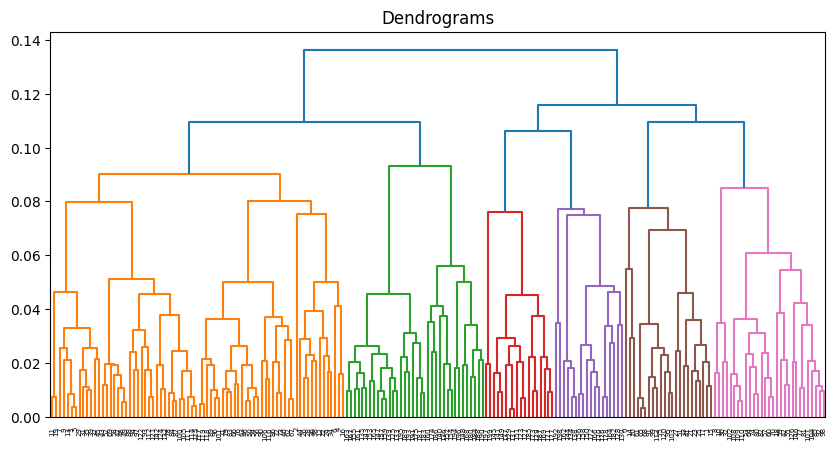

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))
plt.axhline(y=1.39, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


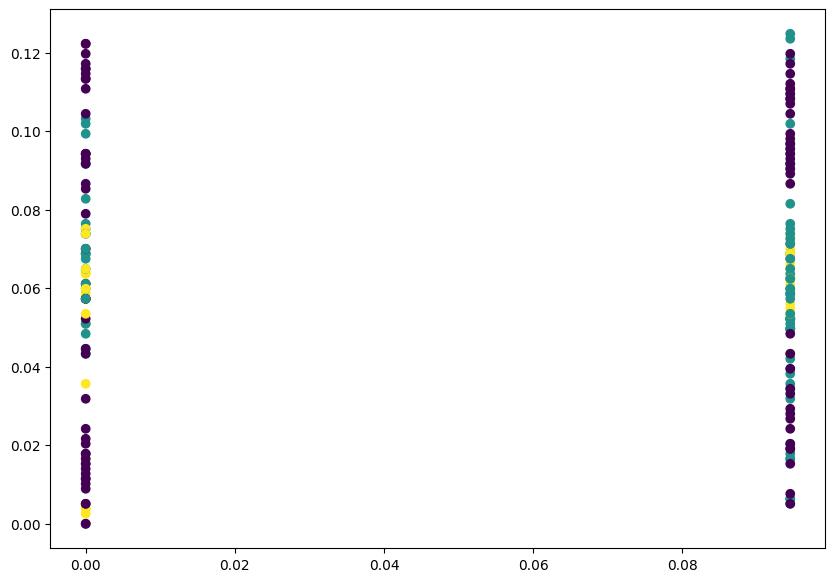

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Gender1'], data_scaled['Spending Score (1-100)'], c=cluster.labels_)